In [3]:
# displaying all prints in one frame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
## image video and HTML import
from IPython.display import HTML, Image, Video

# Challenge 01: Aktienkurse visualisieren

Heute sind wir in der Finanzwelt und werden Aktienkurse visualisieren. Als Data Analyst und Data Scientist ist es sehr wichtig mit aussagekräftigen, vereinfachten Visualisierungen deine Handlungsempfehlungen zu bestärken und zu erklären. Wir wollen hier den Aktienkurs von Facebook über die letzten 30 Tage visualiseren.

Diese Challenge besteht aus 4 Untereinheiten. Dabei lernen wir das Laden von Paketen, Datenimport und Datenwrangling und der Visualisierung. Viel Erfolg!

Vermerk:
- **dick** geschriebene Wörter sind Namen
- *kursiv* geschriebene Wörter sind Funktionen


### 01-00: Pakete laden
**pandas** ist ein gängig genutztes Paket, wenn man Daten analysieren möchte. Wir wollen **pandas** als **pd** abkürzen.

"""Aufgabe: Gib folgendes ein, um das Paket zu laden.

import pandas as pd

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd

### 01-01: Data Import

Um die Daten zu bekommen, gehe auf den folgenden Link, wo du die Tabelle herunterladen kannst, um sie dann in den Ordner zu speichern, wo du auch dieses Skript zu liegen hast. Falls du den Link nicht siehst, maximiere dein Fenster und schau rechts oberhalb der Tabelle nochmal genauer.

http://www.nasdaq.com/symbol/fb/historical 

Diese Tabelle ist als csv-Datei abgelagert. Dieser Dateiformat wird gern genutzt, da sie wenig Speicherplatz braucht. csv steht für comma separated values. Die Werte sollten also mit Kommas separiert sein. Das ist nicht immer so. Manchmal sind es zum Beispiel Tabs oder Semikolons.

Um deine Tabelle in Python zu laden und in die Variable **df** zu speichern, nutze folgende Funktion:

pd.read_csv("\[Dateiname.csv\]")


In [7]:
df = pd.read_csv("HistoricalQuotes.csv")

### 01-02: Datenübersicht
Bei diesen echten Daten werden wir die Aufgaben des Data Wranglings oder Datenpräparation ermitteln und anpackagen. Eine erste Übersicht bekommst du mit den Funktionen *head()*, *shape*  und *dtypes*. 

- *head()* zeigt dir den Inhalt der ersten 5 Zeilen an, um zu schauen, ob der Import auch funktioniert hat.
- *shape* gibt dir an, wieviele Zeilen und Spalten wir in der Tabelle haben.
- *dtypes* zeigt dir an, welche Spalte als Zahl (int64) oder String (object) erkannt wird.

"""Aufgabe: Wende alle drei Funktionen auf **df** an.

In [8]:
print("df.head():")
df.head()
print("df.shape:")
df.shape
print("df.dtypes:")
df.dtypes

df.head():


,Date,Close/Last,Volume,Open,High,Low
0,12/16/2020,$275.67,15885000,$274.76,$277.86,$272.51
1,12/15/2020,$275.55,23979460,$274.83,$276.08,$267.47
2,12/14/2020,$274.19,16376880,$273.372,$277.22,$271.56
3,12/11/2020,$273.55,14391400,$274.53,$276.48,$270.25
4,12/10/2020,$277.12,20065090,$275.535,$278.73,$271.86


df.shape:


(21, 6)

df.dtypes:


Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [9]:
HTML('<iframe width="560" height="315" src="https://youtu.be/Ux7ljatD3pQ" frameborder="0" allowfullscreen></iframe>')


In [10]:
HTML("""
    <video alt="test" controls>
        <source src="data_wrangling/data_wrangling_Trim.mp4" type="video/mp4">
    </video>
""")

![title](data_wrangling/img/data_wrangling01_marked.png "test")

### 01-03: Datenpräparation
Lass uns beginnen tiefer in die Datenlage zu gehen um mögliche Fehler in Struktur und Inhalt zu korrigieren.


"""Aufgabe: Als erstes strukturiere die Tabelle um. Die Spalte **Volume** fällt raus und setze **Open** und **Close/Last** und **Low** und **High** nebeneinander. 

Die Tabellenindizes kannst du mit der Funktion *iloc* selektieren. Die neue Tabelle nennen wir **df2**.

Beispiele:

df.iloc\[ 1:3, :\]                für die Zeilenindizes 1 bis 3, und alle Spalten

df.iloc\[ \[0,21\], \[1:5\]\]     für die Zeilenindizes 0 und 21, und Spaltenindizes 1 bis 5


In [11]:
## keep only the columns that are important for you and change the order
## safe in a new variable df2
df2 = df.iloc[ :, [0, 3, 1, 5, 4]]
df2.head()

,Date,Open,Close/Last,Low,High
0,12/16/2020,$274.76,$275.67,$272.51,$277.86
1,12/15/2020,$274.83,$275.55,$267.47,$276.08
2,12/14/2020,$273.372,$274.19,$271.56,$277.22
3,12/11/2020,$274.53,$273.55,$270.25,$276.48
4,12/10/2020,$275.535,$277.12,$271.86,$278.73


Ab jetzt arbeiten wir nur mit der kleineren Tabelle **df2**.

Schaue dir nun die Spaltennamen mit der Funktion *columns* an.

In [12]:
## change column names
df2.columns

Index(['Date', ' Open', ' Close/Last', ' Low', ' High'], dtype='object')

Wenn du etwas genauer hinschaust, siehst du, dass in den Spaltennummern 1 bis 4 ein unnötiges Leerzeichen in der Zeichenkette vorliegt. Die Spalte **Close/Last** kann auch vereinfacht werden zu **Close**.

"""Aufgabe: Benenne die Spaltennamen mit dem gleichen Befehl um.

In [14]:
df2.columns = ["Date", "Open", "Close", "Low", "High"]

"""Aufgabe: Nun ändere den Typ der Spalte **Date**, was im Video kurz erwähnt wurde. **pd** hat dafür eine Funktion *to_datetime()*

Beispiel: Format umwandeln von "13.12.2020" in "2020-12-13" 

data\["Datum"\] = pd.to_datetime(data\["Datum"\], format="%d.%m.%Y")



In [ ]:
## change type of columns
# column 0 as datetime
df2["Date"] = pd.to_datetime(df2["Date"], format="%m/%d/%Y")

"""Aufgabe: Sortiere die Tabelle nach der Spalte *Date* in chronologischer Reihenfolge mit der Funktion *sort_values*

Beispiel: 

data.sort_values(by="time", ascending=True)

In [ ]:
## sort values by date, ascending
df2 = df2.sort_values(by="Date", ascending=True)
df2.head()

In [ ]:
## remove dollar signs $
df2.iloc[:, 1:] = df2.iloc[:, 1:].replace("\$","", regex=True)
df2.head()

In [ ]:
# columns 1 to 4 as float
# df2.iloc[:, 1:] = df2.iloc[:, 1:].astype(float)
df2 = df2.astype({"Open": float, "Close": float, "Low": float, "High": float})
df2.dtypes
df2.head()

## show descriptive statistics for the columns that are of type numbers
df2.describe()

### 01-03 Daten visualisieren

Text(0, 0.5, 'Value [$]')

,Open,Close,Low,High
Open,1.000000,0.739376,0.852889,0.851399
Close,0.739376,1.000000,0.853997,0.936298
Low,0.852889,0.853997,1.000000,0.856954
High,0.851399,0.936298,0.856954,1.000000


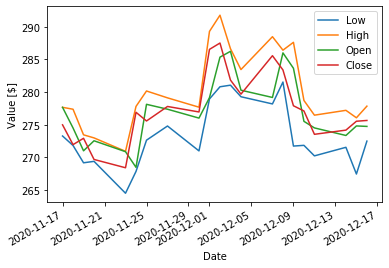

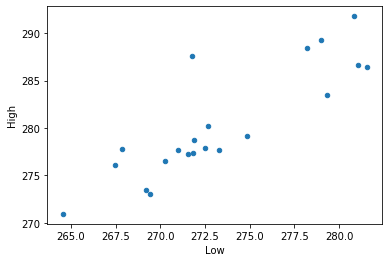

In [31]:
ax = df2.plot(x="Date", y=["Low", "High", "Open", "Close"])
ax.set_ylabel("Value [$]")
# df2.plot(x="Date", y=["Low", "High", "Open", "Close"])
# df.plot(x="Date", y=["Low", "High"])
# df.plot(x="Date", y=["Open", "Close"])
df2.plot.scatter(x="Low", y="High")
df2.iloc[:, 1:].corr("pearson")
